# Tests of jax implementation 
bits of code get compared numpy vs jax and its different variations to get the best performance

In [1]:
import jax.numpy as jnp
import numpy as np
from jax import random

from aisle import aisle as original_le
from aisle import aisle_window as original_le_window
from aisle_jax import aisle as jax_le
from aisle_jax import aisle_window as jax_le_window
from aisle_jax import moving_window

%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
# Load some test weights
weights = np.loadtxt(".honu_weights.csv")
# Slice desired size
weights = weights[:100000]
print(weights.shape)

(100000, 5)


In [3]:
# Aisle setup
oles = (1, 2, 3)
alphas = (2, 6, 8, 16, 12, 25, 48)
window = 1000

In [6]:
ea_window = original_le_window(window, weights, alphas, oles)
ea_window

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

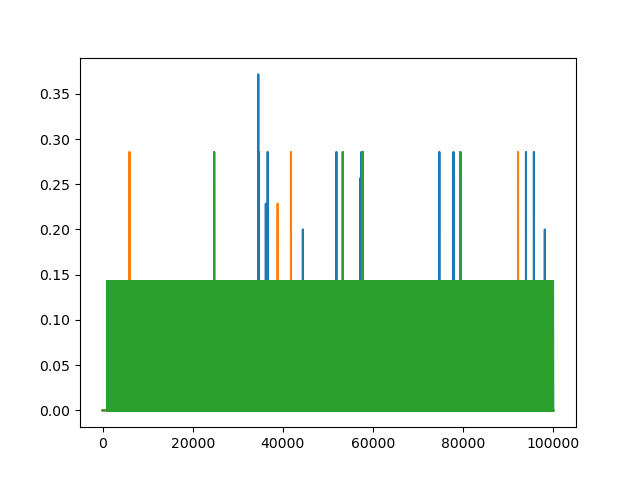

In [7]:
fig = plt.figure()
plt.plot(ea_window)
plt.show()

In [4]:
jea_window = jax_le_window(window, weights, alphas, oles).block_until_ready()
jea_window

DeviceArray([[0., 0., 0.],
             [0., 0., 0.],
             [0., 0., 0.],
             ...,
             [0., 0., 0.],
             [0., 0., 0.],
             [0., 0., 0.]], dtype=float32)

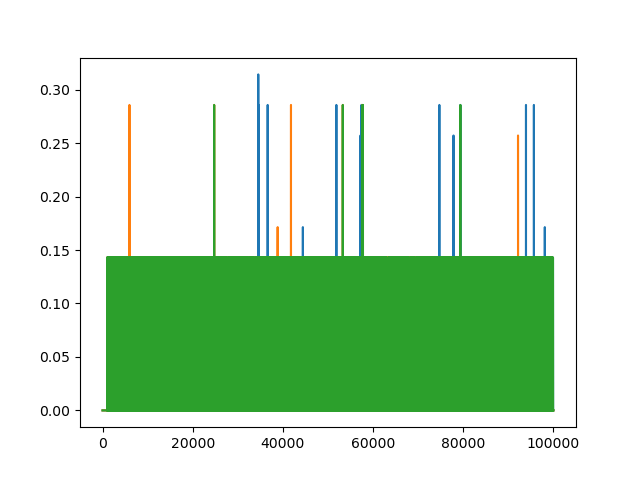

In [5]:
fig = plt.figure()
plt.plot(jea_window)
plt.show()

In [19]:
a = moving_window(jnp.array(weights), window)
a[33535]

DeviceArray([[ 0.38995656,  1.0897696 , -0.8182694 , -0.93712693,
              -0.221061  ],
             [ 0.3899287 ,  1.0897639 , -0.81827515, -0.9371327 ,
              -0.22106676],
             [ 0.3898169 ,  1.0897408 , -0.8182982 , -0.9371558 ,
              -0.22108985],
             ...,
             [ 0.38929358,  1.089617  , -0.81840056, -0.93724555,
              -0.22118178],
             [ 0.38975295,  1.0897117 , -0.8183056 , -0.93715006,
              -0.22108626],
             [ 0.39025116,  1.0898147 , -0.818202  , -0.93704647,
              -0.22098242]], dtype=float32)

In [20]:
# test regular AISLE

ea = original_le(a[33535], alphas, oles)
print("Python way: ", ea)

Python way:  [0.37142857 0.         0.        ]


In [21]:
# test JAX AISLE
jea = jax_le(a[33535], alphas, oles).block_until_ready()
print("JAX way: ", jea)

JAX way:  [[0.31428573 0.         0.        ]]


In [7]:
%timeit original_le(weights, alphas, oles)

766 µs ± 51.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
%timeit jax_le(weights, alphas, oles).block_until_ready()

212 µs ± 2.83 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
%timeit original_le_window(window, weights, alphas, oles)

18.8 s ± 657 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit jax_le_window(window, weights, alphas, oles)

1.62 s ± 30.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
